In [1]:
import re
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Elon_musk.csv", encoding='latin1')
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
data.Text=data.Text.apply(lambda x: re.sub('[^a-zA-Z@0-9 ]', "", x))

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
data.Text=data.Text.apply(lambda x: x.split())

In [7]:
data.Text=data.Text.apply(lambda x: [word for word in x if word not in set(stopwords.words("english"))])
data.head()

,Unnamed: 0,Text
0,1,"[@kunalb11, Im, alien]"
1,2,"[@IDAACarmack, Ray, tracing, Cyberpunk, HDR, n..."
2,3,"[@joerogan, @Spotify, Great, interview]"
3,4,"[@gtera27, Doge, underestimated]"
4,5,"[@teslacn, Congratulations, Tesla, China, amaz..."


In [9]:
with open('positive-words (1).txt', 'r') as file:
    positive_words = file.read().splitlines()

with open('negative-words (1).txt', 'r') as file:
    negative_words = file.read().splitlines()


In [10]:
def sentiment_analysis(text):
    num_positive_words = sum(1 for word in text if word in positive_words)
    num_negative_words = sum(1 for word in text if word in negative_words)
    if num_positive_words > num_negative_words:
        return 'positive'
    elif num_positive_words < num_negative_words:
        return 'negative'
    else:
        return 'neutral'

In [11]:
data['Sentiment'] = data['Text'].apply(sentiment_analysis)

In [12]:
print(data[['Text', 'Sentiment']].head())

                                                Text Sentiment
0                             [@kunalb11, Im, alien]   neutral
1  [@IDAACarmack, Ray, tracing, Cyberpunk, HDR, n...   neutral
2            [@joerogan, @Spotify, Great, interview]   neutral
3                   [@gtera27, Doge, underestimated]   neutral
4  [@teslacn, Congratulations, Tesla, China, amaz...  positive


In [15]:
def sentiment_analysis_score(text):
    num_positive_words = sum(1 for word in text if word in positive_words)
    num_negative_words = sum(1 for word in text if word in negative_words)
    sentiment_score = num_positive_words - num_negative_words
    return sentiment_score

In [16]:
data['Sentiment_Score'] = data['Text'].apply(sentiment_analysis_score)

In [17]:
print(data[['Text', 'Sentiment_Score']].head())

                                                Text  Sentiment_Score
0                             [@kunalb11, Im, alien]                0
1  [@IDAACarmack, Ray, tracing, Cyberpunk, HDR, n...                0
2            [@joerogan, @Spotify, Great, interview]                0
3                   [@gtera27, Doge, underestimated]                0
4  [@teslacn, Congratulations, Tesla, China, amaz...                1


In [19]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --------------- ------------------------ 112.6/300.2 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [21]:
data['Text'] = data['Text'].apply(lambda x: [porter.stem(word) for word in x])

In [22]:
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

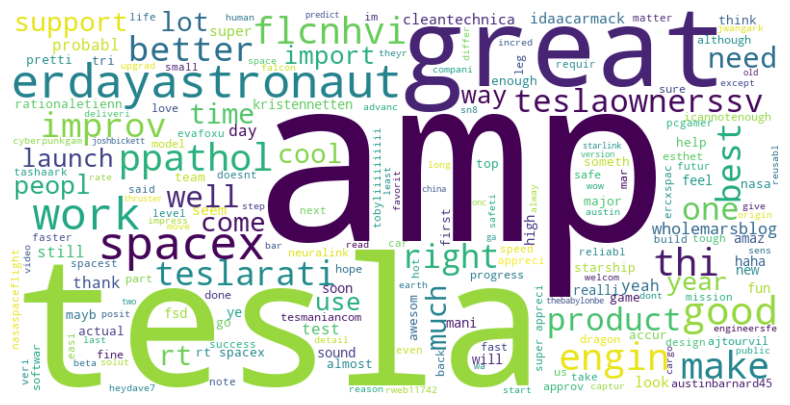

In [23]:
generate_wordcloud(data[data['Sentiment'] == 'positive']['Text'].sum())
# Display word cloud for positive sentiments

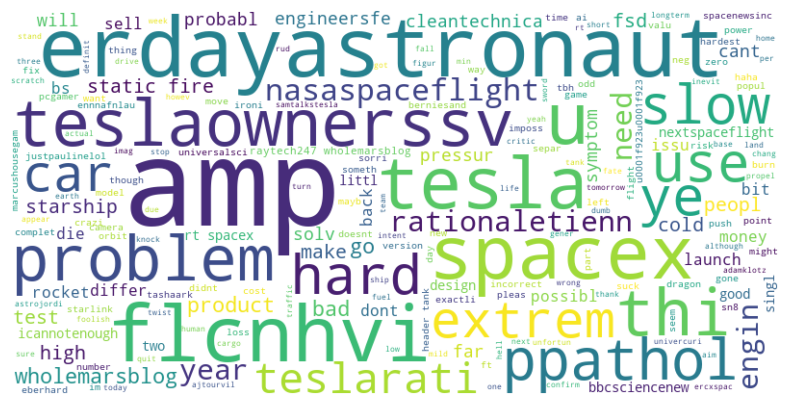

In [24]:
generate_wordcloud(data[data['Sentiment'] == 'negative']['Text'].sum())
# Display word cloud for negative sentiments

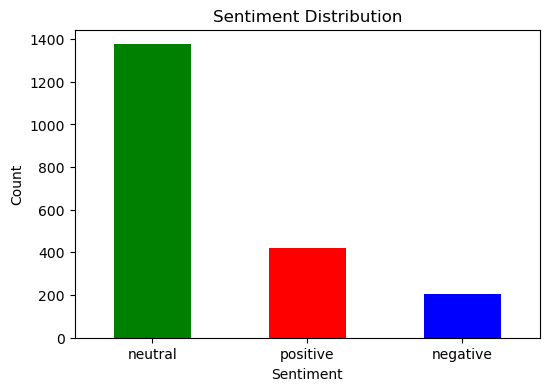

In [25]:
plt.figure(figsize=(6, 4))
data['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [26]:
# Apart from the nuetral comments tesla received a lot more of positive comments than negative comments